In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing Data in to dataframes
companies = pd.read_csv("Datasets/companies.csv", encoding='palmos')
round2 = pd.read_csv("Datasets/rounds2.csv", encoding='palmos')

In [3]:
#Data basic info
print(round2.shape)
print(companies.shape)

(114949, 6)
(66368, 10)


### Checkpoint 1: Data Cleaning 1

##### How many unique companies are present in rounds2?

In [4]:
#Renaming column of round 2 from company_permalink -> permalink
round2.rename(columns={"company_permalink": "permalink"}, inplace=True)

#Converting permalink to lower case as there are cases where it has same value but case sensitive
companies.permalink = companies.permalink.apply(lambda x : x.lower())
round2.permalink = round2.permalink.apply(lambda x : x.lower())

In [5]:
print("There are total ", round2.permalink.unique().shape[0], " unique companies in round2.")

There are total  66368  unique companies in round2.


##### How many unique companies are present in companies?

In [6]:
print("There are total ", companies.permalink.unique().shape[0], " unique companies in companies table.")

There are total  66368  unique companies in companies table.


##### In the companies data frame, which column can be used as the unique key for each company? 
--> permalink

##### Are there any companies in the rounds2 file which are not present in companies? 

In [7]:
companies["permalink"].isin(round2["permalink"]).value_counts()

True    66368
Name: permalink, dtype: int64

As number of unique companies and the number of companies in the round2 which are in comapnies table is same, there are NO missing companies which are in round2 but not in companies.

##### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [8]:
master_frame = pd.merge(round2, companies, on="permalink")
print(master_frame.shape)
master_frame.head()

(114949, 15)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### Data Cleaning in Master Dataframe

In [9]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [10]:
master_frame["funding_round_type"].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [11]:
master_frame = master_frame[pd.notnull(master_frame["category_list"])]
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         80885
funded_at                      0
raised_amount_usd          17624
name                           1
homepage_url                5163
category_list                  0
status                         0
country_code                7007
state_code                  9220
region                      8462
city                        8459
founded_at                 18691
dtype: int64

In [12]:
master_frame = master_frame[pd.notnull(master_frame["country_code"])]
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         75198
funded_at                      0
raised_amount_usd          16003
name                           1
homepage_url                4220
category_list                  0
status                         0
country_code                   0
state_code                  2213
region                      1455
city                        1452
founded_at                 16063
dtype: int64

In [13]:
master_frame = master_frame[pd.notnull(master_frame["raised_amount_usd"])]
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

In [14]:
master_frame = master_frame[pd.notnull(master_frame["name"])]
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61752
funded_at                      0
raised_amount_usd              0
name                           0
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

For now we don't need funding_round_code, homepage_url, state_code, region, city and founded_at. <br>
Hence Keeping the missing values for now.

In [15]:
print(master_frame.shape)

(88528, 15)


### Checkpoint 2: Funding Type Analysis

##### Condition <br> Spark Funds wants to invest between 5 to 15 million USD per investment round

In [16]:
investment_type = ['venture', 'seed', 'angel', 'private_equity']
selected_funds = master_frame[master_frame["funding_round_type"].isin(investment_type)]

In [17]:
# Most representative value of the investment amount based on type

print("\n\n")
print(selected_funds.groupby(['funding_round_type'])['raised_amount_usd'].mean())
print("\n\n")
print(selected_funds.groupby(['funding_round_type'])['raised_amount_usd'].median())
print("\n\n")
print(selected_funds.groupby(['funding_round_type'])['raised_amount_usd'].sum())




funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.478279e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64



funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64



funding_round_type
angel             4.274925e+09
private_equity    1.345680e+11
seed              1.577468e+10
venture           5.605234e+11
Name: raised_amount_usd, dtype: float64


In [18]:
#Applying condition for the Spark Funds

In [19]:
#Number of venture and private_equity
print("Venture: \n ", (selected_funds["funding_round_type"] == "venture").value_counts())
print("\n\nPrivate Equity: \n ", (selected_funds["funding_round_type"] == "private_equity").value_counts())

Venture: 
  True     47809
False    27314
Name: funding_round_type, dtype: int64


Private Equity: 
  False    73303
True      1820
Name: funding_round_type, dtype: int64


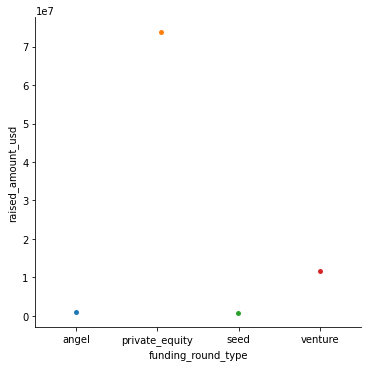

In [20]:
fund_round_grp = selected_funds.groupby('funding_round_type')['raised_amount_usd'].mean().reset_index()
sns.catplot(data = fund_round_grp, x=fund_round_grp['funding_round_type'], y= fund_round_grp['raised_amount_usd'])

fund_round_grp = fund_round_grp.loc[(fund_round_grp["raised_amount_usd"] >= 5000000) & (fund_round_grp["raised_amount_usd"]<=15000000)]

In [21]:
fund_round_grp

,funding_round_type,raised_amount_usd
3,venture,1.172422e+07


#### Type of investment suitable for Spark Funds is venture

### Checkpoint 3: Country Analysis

##### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [22]:
venture_fund = master_frame[master_frame["funding_round_type"].isin(["venture"])]
print(venture_fund.shape)
venture_fund.head()

(47809, 15)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [23]:
top9 = venture_fund.groupby('country_code')['raised_amount_usd'].sum().reset_index().sort_values(['raised_amount_usd'], ascending =False).head(9)

##### From the above list the English speaking contries are
-  USA
-  GBR
-  IND
-  CAN


In [24]:
english_speaking = ['USA', 'GBR', 'CAD', 'IND']
top3 = top9[top9['country_code'].isin(english_speaking)]

##### The top three English-speaking countries in the data frame

In [25]:
print(top3.head())

   country_code  raised_amount_usd
94          USA       4.200680e+11
29          GBR       2.007281e+10
39          IND       1.426151e+10


### Checkpoint 4: Sector Analysis 1

##### Given Rule
-  The first string before the vertical bar will be considered the primary sector from category_list	

In [26]:
print(master_frame.shape)
print(master_frame.info())
print(master_frame.category_list.value_counts())


(88528, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88528 entries, 0 to 114947
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88528 non-null  object 
 1   funding_round_permalink  88528 non-null  object 
 2   funding_round_type       88528 non-null  object 
 3   funding_round_code       26776 non-null  object 
 4   funded_at                88528 non-null  object 
 5   raised_amount_usd        88528 non-null  float64
 6   name                     88528 non-null  object 
 7   homepage_url             85277 non-null  object 
 8   category_list            88528 non-null  object 
 9   status                   88528 non-null  object 
 10  country_code             88528 non-null  object 
 11  state_code               86797 non-null  object 
 12  region                   87344 non-null  object 
 13  city                     87347 non-null  object 
 14  founded_a

In [27]:
# Storing the primary sector as per the rule

master_frame["primary_sector"] = master_frame.category_list.apply(lambda x : x.split('|')[0] )

In [28]:
master_frame.primary_sector.value_counts()

Biotechnology      9670
Software           5897
Advertising        3936
E-Commerce         3602
Analytics          2944
                   ... 
Social Business       1
Productivity          1
Usability             1
Mobile Shopping       1
Ride Sharing          1
Name: primary_sector, Length: 708, dtype: int64

## Mapping of Sectors

In [29]:
mapping = pd.read_csv("Datasets/mapping.csv")
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [30]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

##### We need a column in mapping which contains the Sector for the category_list

In [31]:
#Function return the sector (where value is 1 in the cat column)

def get_sector(row):    
    for c in mapping.columns:
        if row[c] == 1:
            return c
        

In [32]:
mapping['main_sector'] = mapping.apply(get_sector, axis =1)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [33]:
# We no more need encoding as we have category and sector columns
mapping = pd.DataFrame(mapping, columns=['category_list', 'main_sector'])

In [34]:
#To perform merge we need same column name hence renaming category_list -> primary_sector
mapping.rename(columns={"category_list": "primary_sector"}, inplace=True)
mapping.head()

,primary_sector,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


##### Merging mapping with master_frame to attach additional column of main_sector in master_frame

In [35]:
master_frame = pd.merge(master_frame, mapping, on = "primary_sector")
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment


main_sector
Automotive & Sports                        AxesSubplot(0.125,0.125;0.775x0.755)
Cleantech / Semiconductors                 AxesSubplot(0.125,0.125;0.775x0.755)
Entertainment                              AxesSubplot(0.125,0.125;0.775x0.755)
Health                                     AxesSubplot(0.125,0.125;0.775x0.755)
Manufacturing                              AxesSubplot(0.125,0.125;0.775x0.755)
News, Search and Messaging                 AxesSubplot(0.125,0.125;0.775x0.755)
Others                                     AxesSubplot(0.125,0.125;0.775x0.755)
Social, Finance, Analytics, Advertising    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

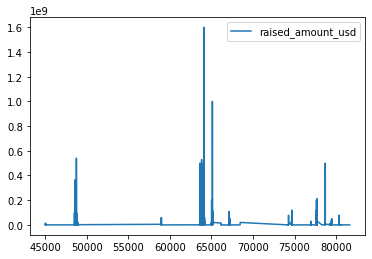

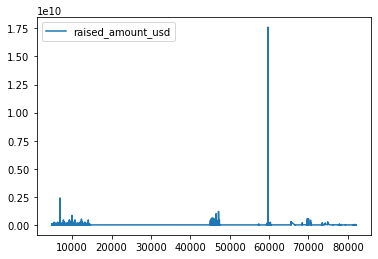

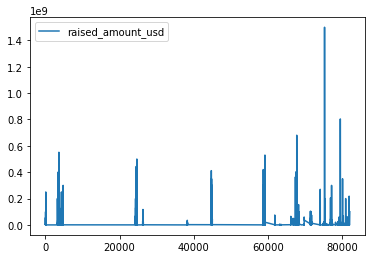

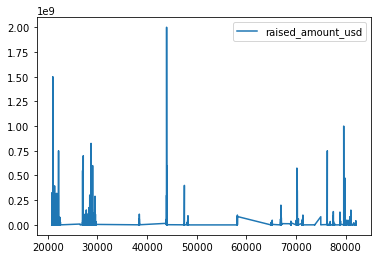

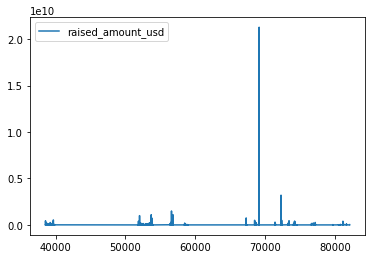

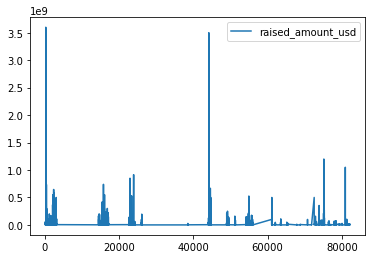

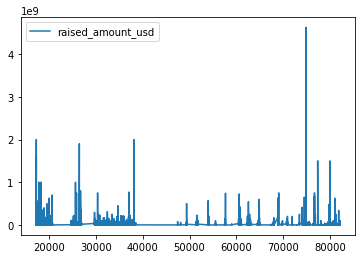

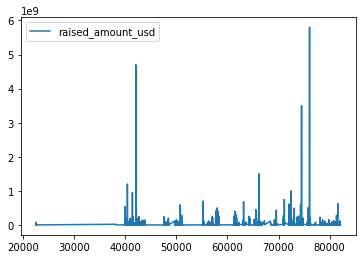

In [36]:
master_frame.groupby('main_sector').plot()